In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('covid19.csv')

## 1. Get an initial sniff of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110487 entries, 0 to 110486
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   iso_code                 110487 non-null  object 
 1   date                     110487 non-null  object 
 2   new_cases                105626 non-null  float64
 3   new_deaths               95315 non-null   float64
 4   icu_patients             11847 non-null   float64
 5   hosp_patients            14224 non-null   float64
 6   people_vaccinated        21273 non-null   float64
 7   people_fully_vaccinated  18288 non-null   float64
dtypes: float64(6), object(2)
memory usage: 6.7+ MB


In [4]:
df.shape

(110487, 8)

In [5]:
df.describe()

,new_cases,new_deaths,icu_patients,hosp_patients,people_vaccinated,people_fully_vaccinated
count,105626.000000,95315.000000,11847.000000,14224.000000,2.127300e+04,1.828800e+04
mean,6271.504620,145.846918,963.213978,4279.005202,2.636460e+07,1.561379e+07
std,38596.749711,796.499109,2767.213574,11433.354107,1.470117e+08,8.267387e+07
min,-74347.000000,-1918.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
25%,2.000000,0.000000,29.000000,107.000000,1.462080e+05,7.176000e+04
50%,82.000000,2.000000,142.000000,559.500000,9.502120e+05,5.955320e+05
75%,867.000000,18.000000,599.500000,2408.250000,5.379359e+06,3.746119e+06
max,905993.000000,18000.000000,28889.000000,133214.000000,2.491591e+09,1.871760e+09


In [6]:
df.head(2)

,iso_code,date,new_cases,new_deaths,icu_patients,hosp_patients,people_vaccinated,people_fully_vaccinated
0,AFG,2020-02-24,1.0,NaN,NaN,NaN,NaN,NaN
1,AFG,2020-02-25,0.0,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isnull().any()

iso_code                   False
date                       False
new_cases                   True
new_deaths                  True
icu_patients                True
hosp_patients               True
people_vaccinated           True
people_fully_vaccinated     True
dtype: bool

## 2. Initial cleaning up

In [8]:
# check null values
df.isnull().sum()

iso_code                       0
date                           0
new_cases                   4861
new_deaths                 15172
icu_patients               98640
hosp_patients              96263
people_vaccinated          89214
people_fully_vaccinated    92199
dtype: int64

In [9]:
df.fillna(0, inplace=True)
df.head(5)

,iso_code,date,new_cases,new_deaths,icu_patients,hosp_patients,people_vaccinated,people_fully_vaccinated
0,AFG,2020-02-24,1.0,0.0,0.0,0.0,0.0,0.0
1,AFG,2020-02-25,0.0,0.0,0.0,0.0,0.0,0.0
2,AFG,2020-02-26,0.0,0.0,0.0,0.0,0.0,0.0
3,AFG,2020-02-27,0.0,0.0,0.0,0.0,0.0,0.0
4,AFG,2020-02-28,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# check negative values
df.index[df['new_cases'] < 0]

Int64Index([  3525,   3835,  11230,  20856,  21272,  23695,  25323,  26066,
             27158,  28943,  28944,  28947,  29066,  30156,  35282,  35283,
             35753,  35756,  35772,  35778,  35803,  35812,  35813,  35838,
             35967,  37134,  38586,  42419,  43511,  45431,  45961,  48860,
             49139,  49541,  49805,  51623,  52515,  59126,  59726,  62505,
             62881,  63733,  65731,  68283,  69637,  70892,  70900,  71170,
             71272,  72019,  77726,  80453,  85090,  85208,  93567,  93598,
             93879,  97488,  97494,  99066,  99153,  99189,  99190, 102546,
            102579, 104570, 104609, 105307, 109078, 110013],
           dtype='int64')

In [11]:
df.index[df['new_deaths'] < 0]

Int64Index([  2914,   5914,   6335,   6346,   6505,   6587,   6845,   6848,
             10294,  10998,
            ...
             96657,  96710,  96738,  96744,  96754,  96762,  96764,  98096,
            107184, 107868],
           dtype='int64', length=117)

In [12]:
print(len(df.index[df['new_cases'] < 0]))
print(len(df.index[df['new_deaths'] < 0]))

70
117


In [13]:
df[df['new_cases'] < 0] = 0
df[df['new_deaths'] < 0] = 0
df.head(5)

,iso_code,date,new_cases,new_deaths,icu_patients,hosp_patients,people_vaccinated,people_fully_vaccinated
0,AFG,2020-02-24,1.0,0.0,0.0,0.0,0.0,0.0
1,AFG,2020-02-25,0.0,0.0,0.0,0.0,0.0,0.0
2,AFG,2020-02-26,0.0,0.0,0.0,0.0,0.0,0.0
3,AFG,2020-02-27,0.0,0.0,0.0,0.0,0.0,0.0
4,AFG,2020-02-28,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Visualizations

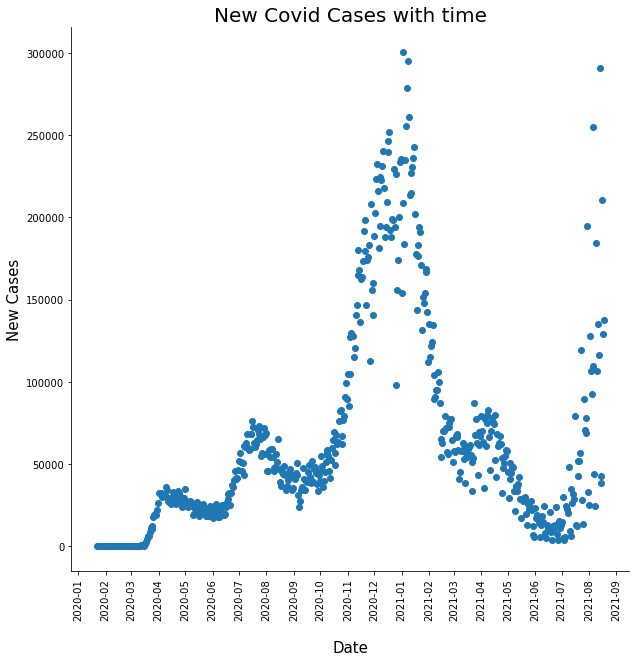

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
sub_df = df[df.iso_code == 'USA']
sub_df['date'] = pd.to_datetime(sub_df['date'])

ax.scatter(sub_df.date, sub_df.new_cases)

# Setting title and labels
plt.title('New Covid Cases with time', size=20)
ax.set_xlabel('Date', size=15)
ax.set_ylabel('New Cases', size=15)
ax.xaxis.labelpad = 20

# Setting axis-ticks
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=90)

# Removing top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

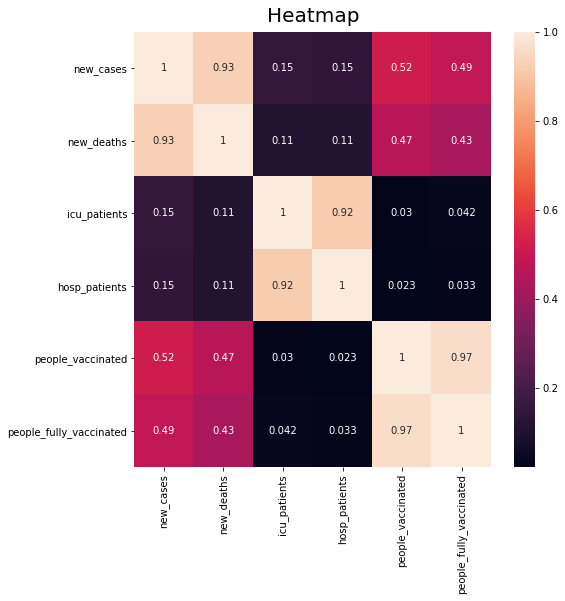

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), ax=ax, annot=True)
plt.title('Heatmap', size=20, pad=10)
plt.show()